## The .apply() method

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tips.csv")

df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [4]:
df["CC Number"][0]

3560325168603410

In [5]:
def last_four(num):
    return str(num)[-4:]

In [6]:
last_four(df["CC Number"][0])

'3410'

In [7]:
df['last_four'] = df["CC Number"].apply(last_four)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221


In [8]:
def yelp(price):
    if price < 10:
        return "$"
    elif price  >= 10 and price < 30:
        return "$$"
    else:
        return "$$$"

df["Expensive"] = df["total_bill"].apply(yelp)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$


In [9]:
df["total_bill"].apply(lambda bill:bill * 0.18)

0      3.0582
1      1.8612
2      3.7818
3      4.2624
4      4.4262
        ...  
239    5.2254
240    4.8924
241    4.0806
242    3.2076
243    3.3804
Name: total_bill, Length: 244, dtype: float64

In [10]:
def quality(toal_bill,tip):
    if tip / toal_bill > 0.25:
        return "Generous"
    else:
        return "Other"
df["Tip Quality"] = df[["total_bill","tip"]].apply(lambda df:quality(df["total_bill"],df["tip"]),axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,$$,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,$$,Other
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,5994,$$,Other
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,7221,$$,Other


### sort_values()

In [11]:
df.sort_values("tip")

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
111,7.25,1.00,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,$,Other
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other


In [12]:
df.sort_values(['tip','size'],ascending=False)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Expensive,Tip Quality
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,8236,$$$,Other
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,5212,$$$,Other
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,9808,$$$,Other
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,0595,$$$,Other
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,8508,$$$,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,$$,Other
92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,$,Other
236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.30,Matthew Myers,3543676378973965,Sat5032,3965,$$,Other
67,3.07,1.00,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,$,Generous


In [13]:
df[["total_bill","tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [14]:
print(df["total_bill"].max())

print(df["total_bill"].idxmax())

print(df.iloc[170])

50.81
170
total_bill                     50.81
tip                             10.0
sex                             Male
smoker                           Yes
day                              Sat
time                          Dinner
size                               3
price_per_person               16.94
Payer Name             Gregory Clark
CC Number           5473850968388236
Payment ID                   Sat1954
last_four                       8236
Expensive                        $$$
Tip Quality                    Other
Name: 170, dtype: object


In [15]:
s = df["sex"].value_counts()
s.name = "sex"
s

sex
Male      157
Female     87
Name: sex, dtype: int64

In [16]:
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [17]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

### map

In [18]:
my_map = {"Dinner":"D","Lunch":"L"}
df["time"].map(my_map)

0      D
1      D
2      D
3      D
4      D
      ..
239    D
240    D
241    D
242    D
243    D
Name: time, Length: 244, dtype: object

In [19]:
my_map = {"Dinner" :1,"Lunch" :0}
df["time"].map(my_map)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time, Length: 244, dtype: int64

In [20]:
import pandas as pd
#有序
# 使用 pd.Categorical 將 day 欄位轉換為數字
df = pd.DataFrame({'day': ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']})
#ordered=True 表示會根據 categories 分配數字
df['day_number'] = pd.Categorical(df['day'], categories=[ 'Mon','Sun', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']).codes
print(df)

   day  day_number
0  Sun           1
1  Mon           0
2  Tue           2
3  Wed           3
4  Thu           4
5  Fri           5
6  Sat           6


## enumerate

In [21]:
fruits = ['apple', 'banana', 'cherry']
for index, fruit in enumerate(fruits):
    print(index, fruit)

0 apple
1 banana
2 cherry


In [22]:
import pandas as pd

# 範例資料
data = {
    'day': ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
}
df = pd.DataFrame(data)

# 定義自訂的順序
custom_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# 使用 enumerate 將文字欄位轉換為數字
def convert_to_numeric_custom_order(df, col, order):
    mapping = {category: i for i, category in enumerate(order)}
    df[col + '_number'] = df[col].map(mapping)
    return df

# 將 'day' 欄位按照自訂順序轉換為數字
df = convert_to_numeric_custom_order(df, 'day', custom_order)

# 顯示轉換後的 DataFrame
print(df)

   day  day_number
0  Sun           6
1  Mon           0
2  Tue           1
3  Wed           2
4  Thu           3
5  Fri           4
6  Sat           5
7  Sun           6


# Combining DataFrames

In [23]:
import numpy as np
import pandas as pd

In [24]:
data_one = {'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']}
data_two = {'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}
one = pd.DataFrame(data_one)
two = pd.DataFrame(data_two)

In [25]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [26]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [27]:
axis0 = pd.concat([one,two],axis=0)
axis0



,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


In [28]:
axis0 = pd.concat([one,two],axis=0,ignore_index=True)
axis0

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
4,NaN,NaN,C0,D0
5,NaN,NaN,C1,D1
6,NaN,NaN,C2,D2
7,NaN,NaN,C3,D3


In [29]:
axis1 = pd.concat([one,two],axis=1)
axis1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


# Merge

In [30]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [31]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [32]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


## Inner Join
Inner 表示 左右標都擁有的欄位內容

In [33]:
pd.merge(registrations,logins,how="inner",on="name")

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


## Left Join
left 表示 左表全都顯示 右邊跟左表有關係的才顯示


In [34]:
pd.merge(registrations,logins,how="left",on="name")

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


## Right Join
right 表示 右表全都顯示 左邊跟右表有關係的才顯示

In [35]:
pd.merge(registrations,logins,how="right",on="name")

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


## Outer Join
左右表全都顯示

In [36]:
pd.merge(registrations,logins,how="outer",on="name")

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


# Pivot Tables(樞紐分析表)

In [37]:
import numpy as np
import pandas as pd
df = pd.read_csv('Sales_Funnel_CRM.csv')

In [38]:
df

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


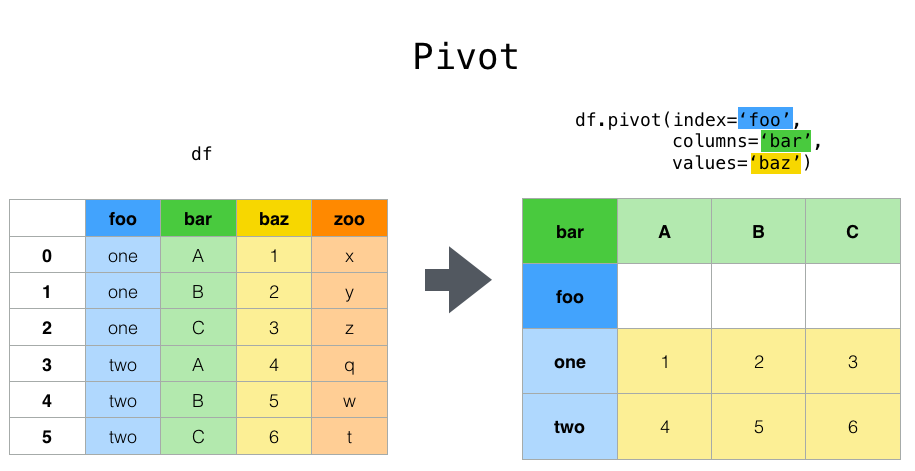

In [39]:
licenses = df[["Company","Product","Licenses"]]
pd.pivot(data = licenses,index="Company",columns="Product",values="Licenses" )

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


In [40]:
pd.pivot_table(df,index="Company",aggfunc="sum")

,Account Manager,Account Number,Contact,Licenses,Product,Sale Price,Status
Company,,,,,,,
Google,Edward ThorpEdward ThorpEdward Thorp,6370194,Larry PagerLarry PagerLarry Pager,600,AnalyticsPredictionTracking,3150000,PresentedPresentedUnder Review
ATT,Claude ShannonClaude Shannon,1396064,Cindy PhonerCindy Phoner,300,TrackingPrediction,1050000,Under ReviewPresented
Apple,Claude Shannon,405886,Cindy Phoner,300,Analytics,4550000,Won
BOBO,Edward Thorp,2192650,Larry Pager,150,Analytics,2450000,Lost
CVS Health,Claude Shannon,902797,Emma Gordian,450,Tracking,490000,Won
Cisco,Claude ShannonClaude Shannon,4338998,Emma GordianEmma Gordian,600,AnalyticsGPS Positioning,4900000,LostPresented
Exxon Mobile,Claude Shannon,470248,Cindy Phoner,150,Analytics,2100000,Presented
IKEA,Edward Thorp,420496,Elon Tusk,300,Analytics,4550000,Won
Microsoft,Edward Thorp,1216870,Will Grates,300,Tracking,350000,Under Review


In [41]:
pd.pivot_table(df,index="Company",aggfunc="sum")[["Licenses","Sale Price"]]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [42]:
df.groupby('Company').sum()[['Licenses','Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [43]:
pd.pivot_table(df,index=["Account Manager","Contact"],values=['Sale Price'],aggfunc='sum')

Sale Price
Account Manager Contact                 
Claude Shannon  Cindy Phoner     7700000
                Emma Gordian    12390000
Edward Thorp    Elon Tusk        8050000
                Larry Pager      5600000
                Will Grates      2800000

In [44]:
pd.pivot_table(df,index=["Account Manager","Contact"],
               values=["Sale Price"],columns=["Product"],aggfunc=["sum"],fill_value=0)

sum                                    
                             Sale Price                                    
Product                       Analytics GPS Positioning Prediction Tracking
Account Manager Contact                                                    
Claude Shannon  Cindy Phoner    6650000               0     700000   350000
                Emma Gordian   11550000          350000          0   490000
Edward Thorp    Elon Tusk       7350000               0     700000        0
                Larry Pager     4550000               0     700000   350000
                Will Grates     2450000               0          0   350000

## seaborn

https://seaborn.pydata.org/

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("dm_office_sales.csv")
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


# Scatterplot

<Axes: xlabel='salary', ylabel='sales'>

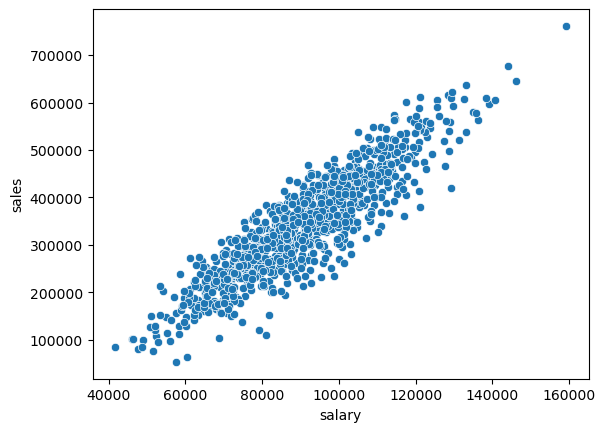

In [46]:
sns.scatterplot(x="salary",y="sales",data=df)

<Axes: xlabel='salary', ylabel='sales'>

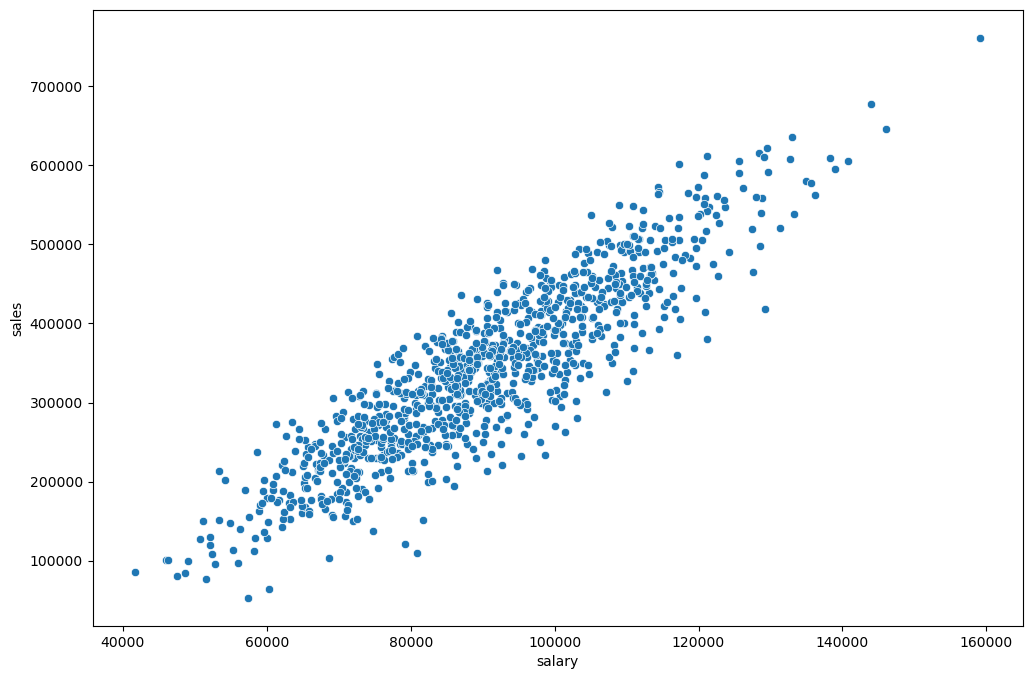

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df)

https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: xlabel='salary', ylabel='sales'>

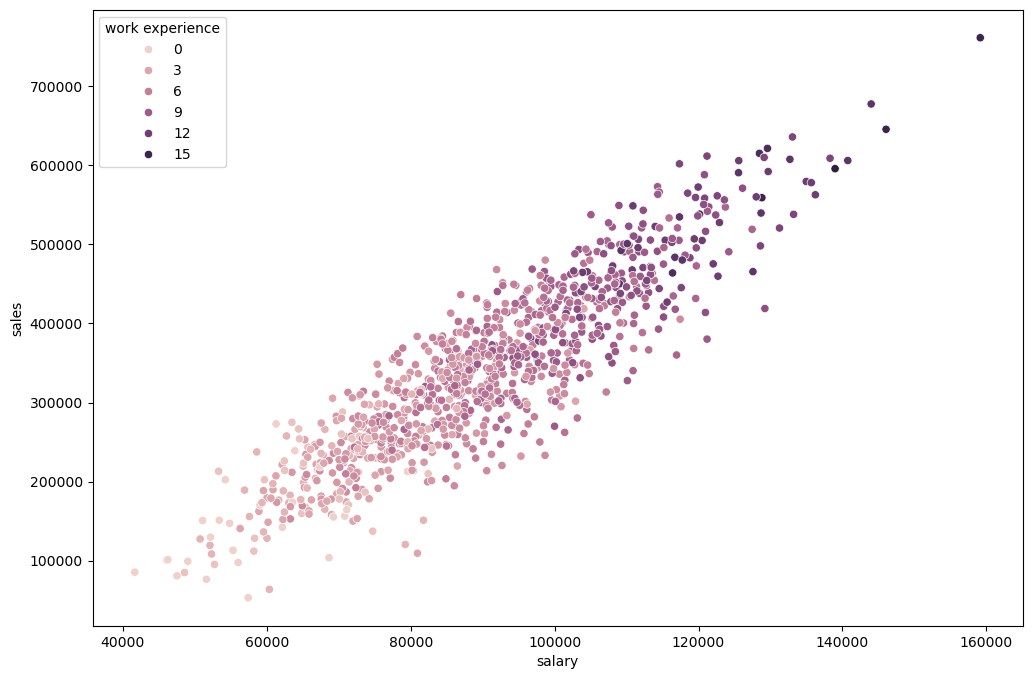

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience")

<Axes: xlabel='salary', ylabel='sales'>

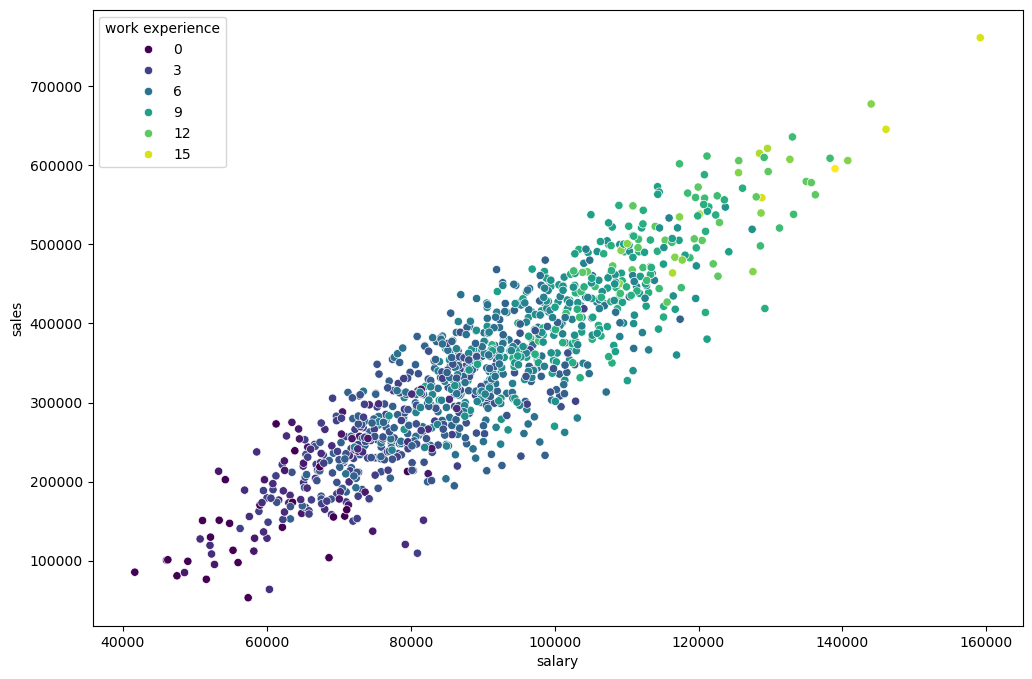

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",palette="viridis")

<Axes: xlabel='salary', ylabel='sales'>

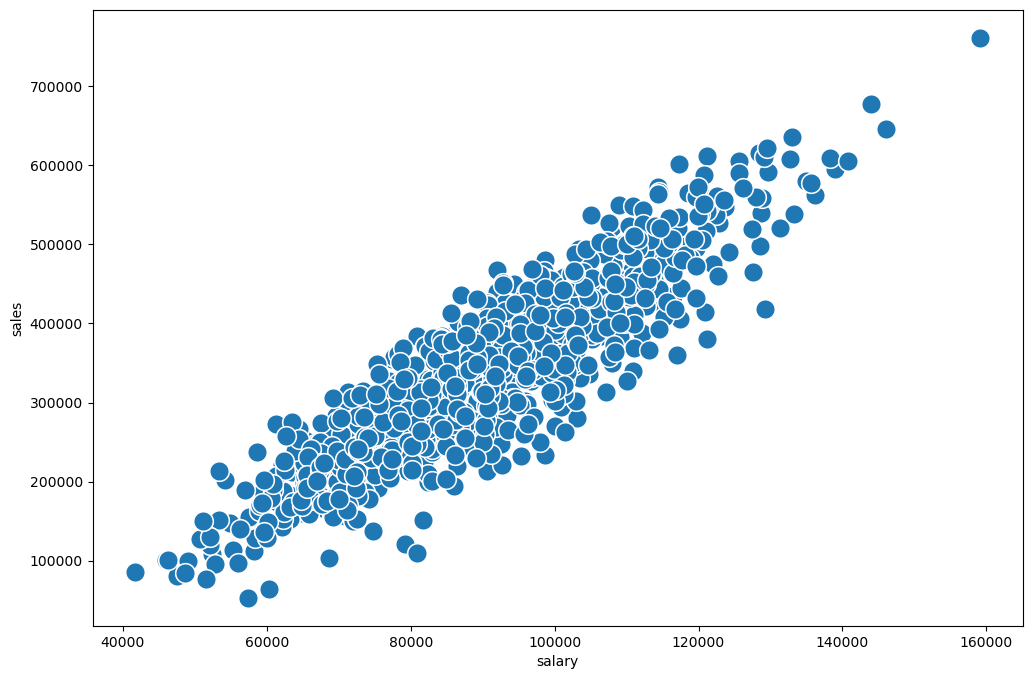

In [50]:

plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,s=200)

<Axes: xlabel='salary', ylabel='sales'>

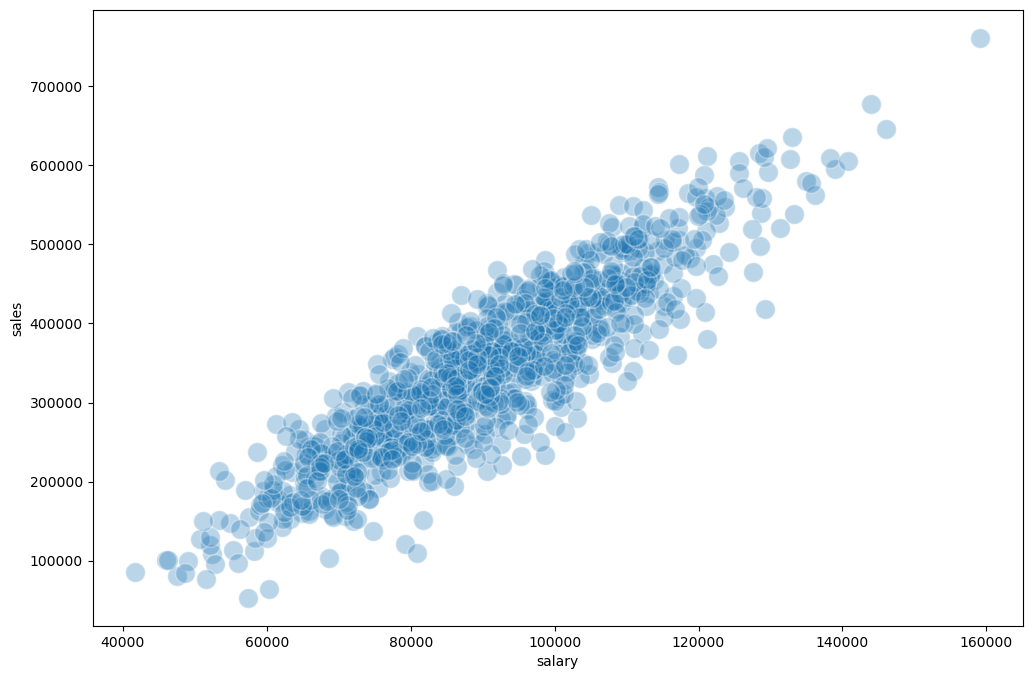

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,s=200,alpha=0.3)

<Axes: xlabel='salary', ylabel='sales'>

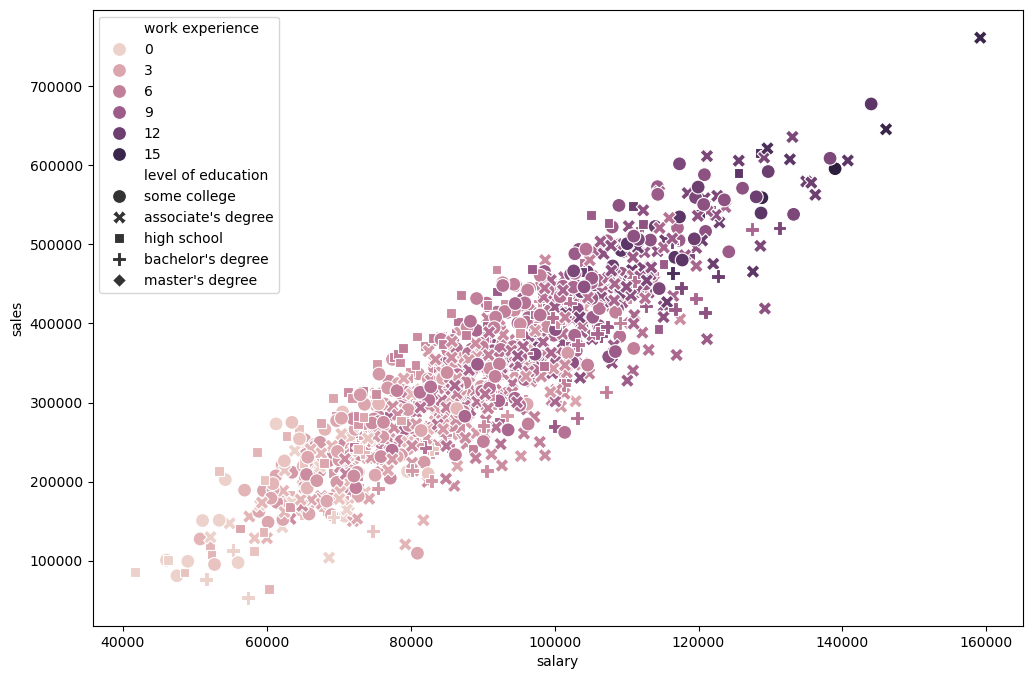

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",style="level of education",s=100)

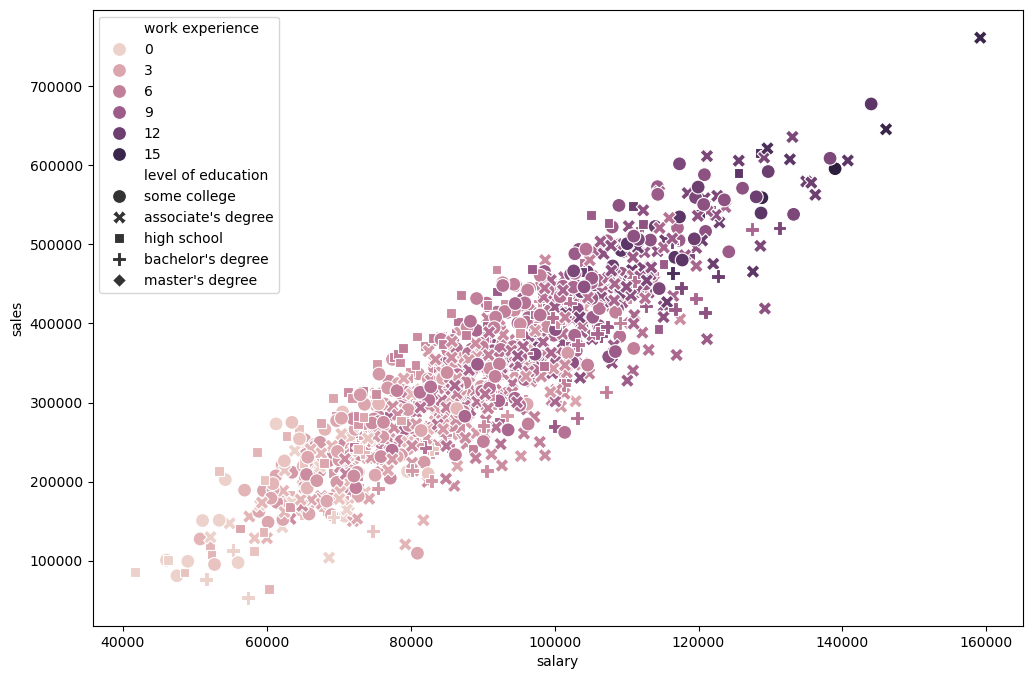

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="salary",y="sales",data=df,hue="work experience",style="level of education",s=100)
plt.savefig("my.jpg")

In [54]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## 分布

<Axes: xlabel='salary'>

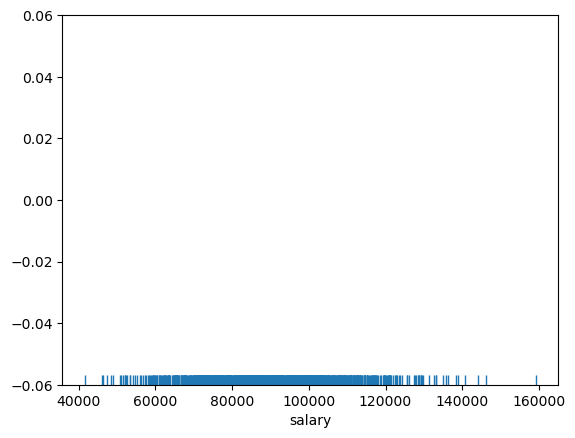

In [16]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("dm_office_sales.csv")
df.head()
sns.rugplot(x='salary',data=df)

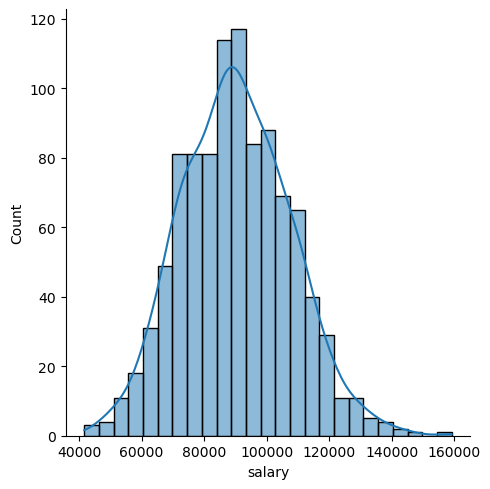

In [17]:
sns.displot(data=df,x='salary',kde=True) #kde 平滑數據分佈

## 類別圖表

<Axes: xlabel='division', ylabel='count'>

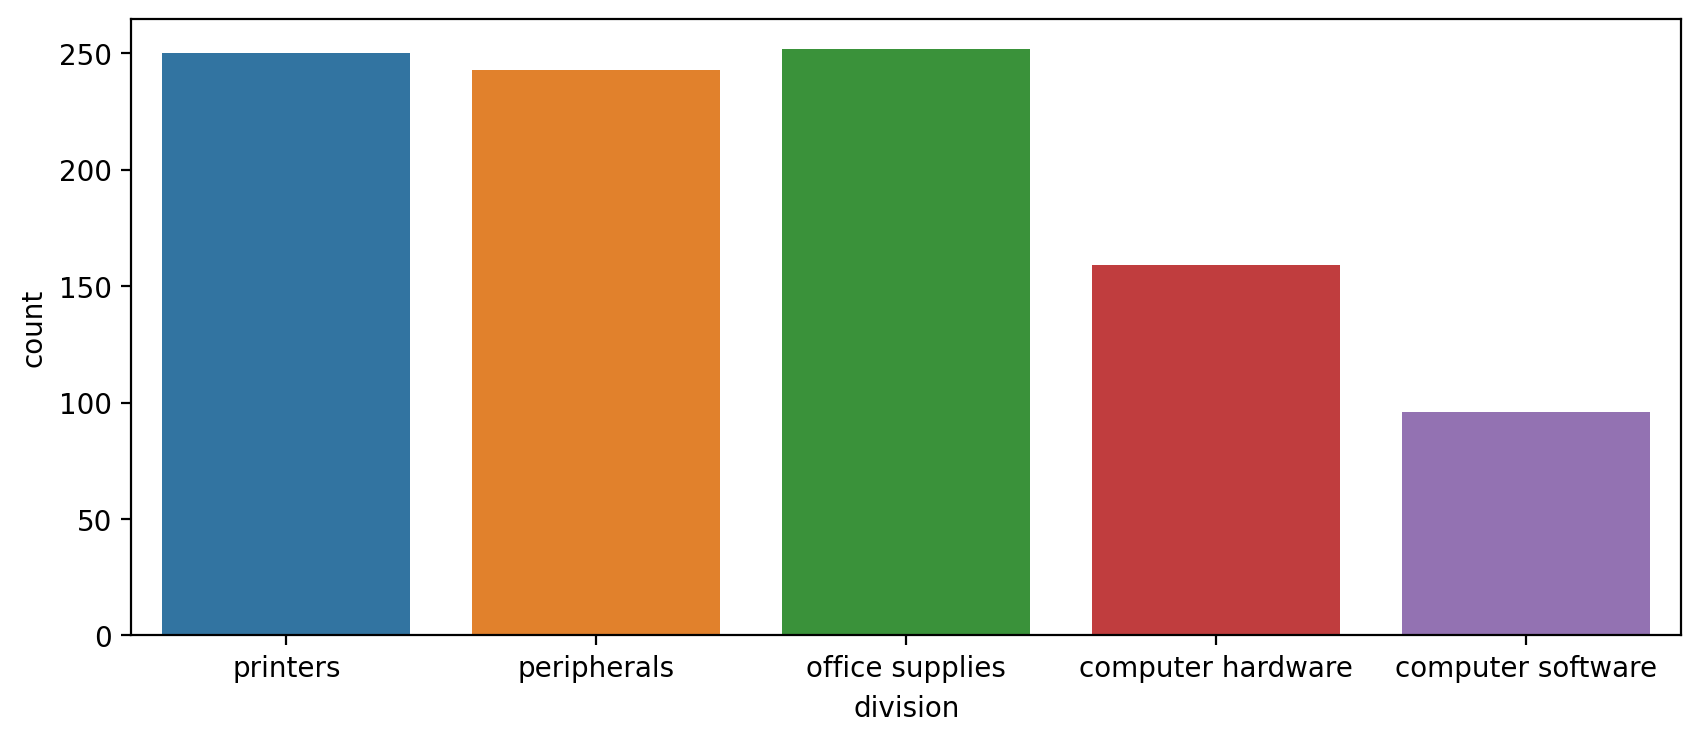

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='division',data=df,hue='division')

<Axes: xlabel='level of education', ylabel='count'>

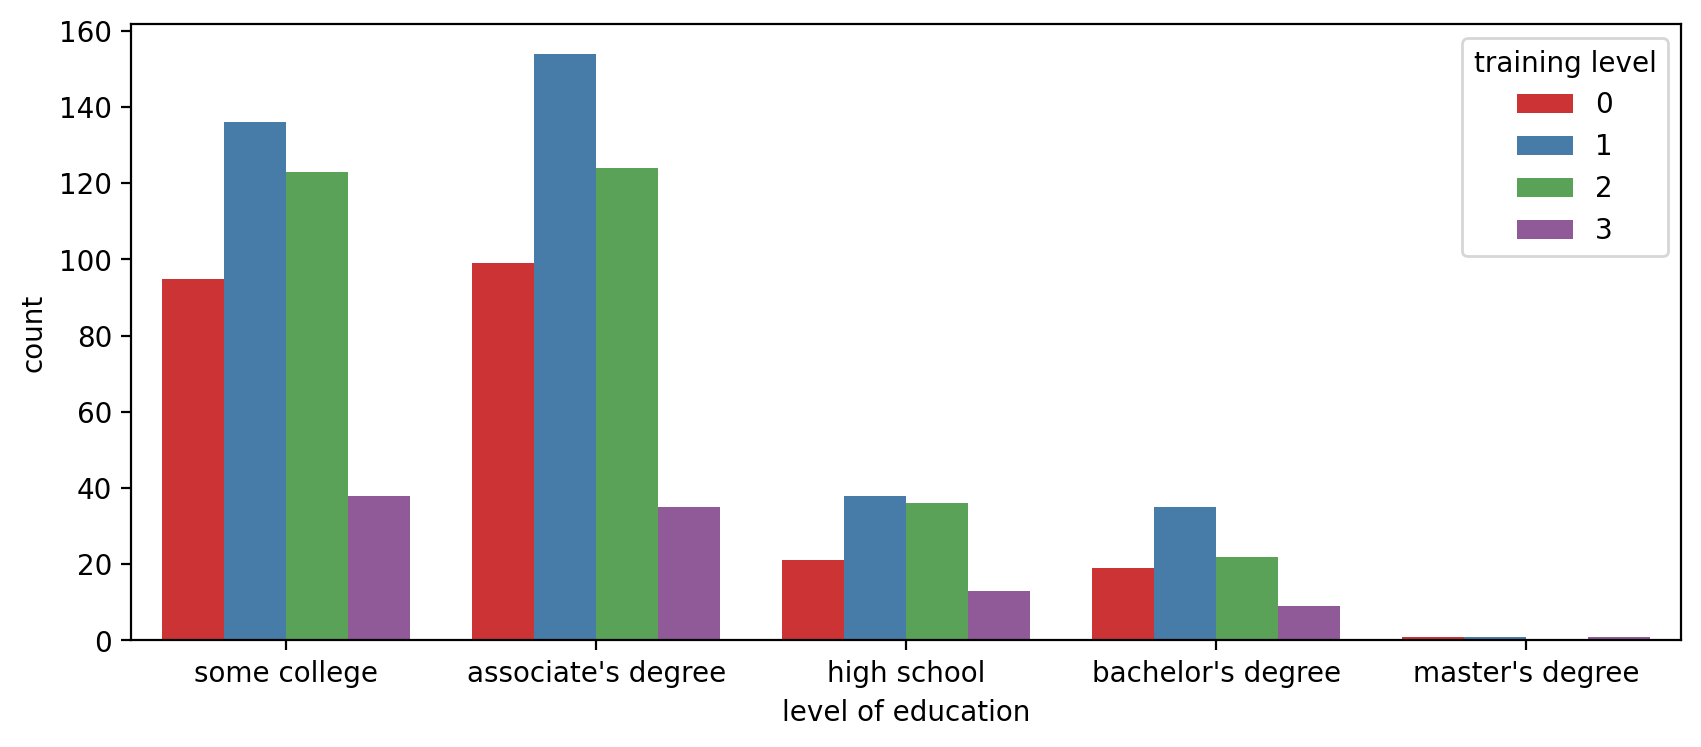

In [19]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df,hue='training level',palette='Set1')

<Axes: xlabel='level of education', ylabel='salary'>

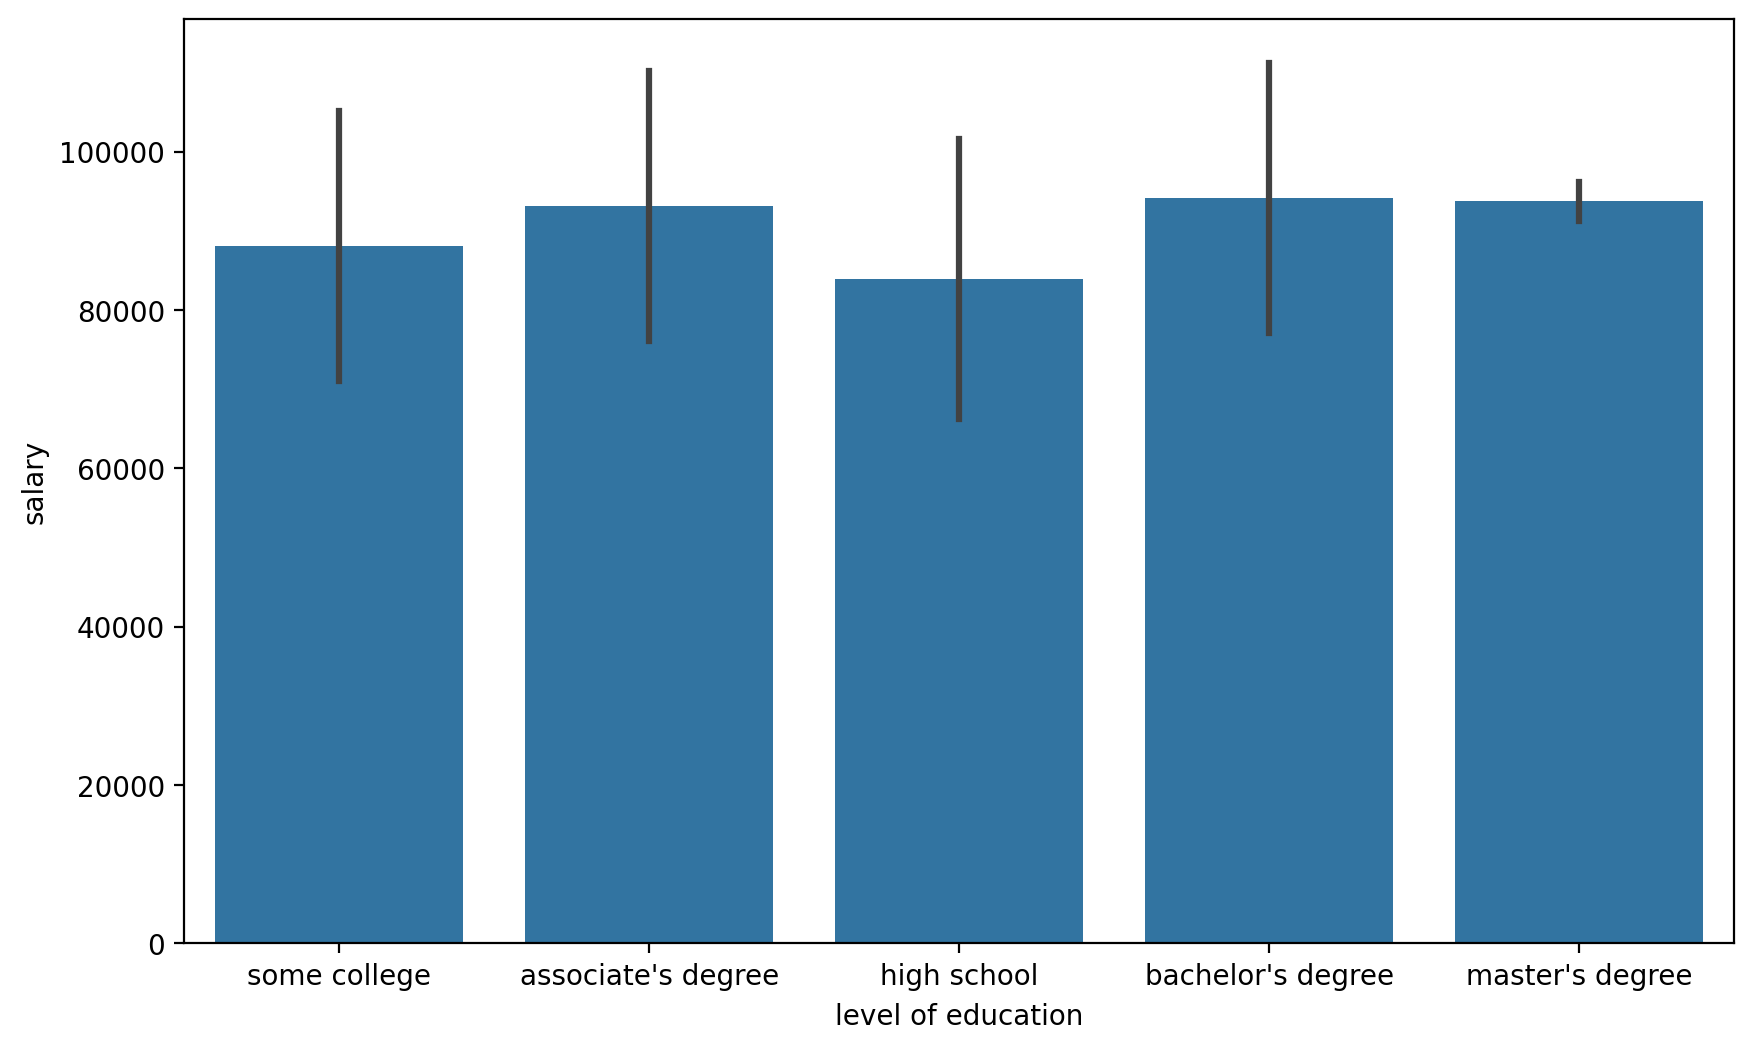

In [26]:
plt.figure(figsize=(10,6),dpi=200)
import numpy as np
sns.barplot(x='level of education',y='salary',data=df,estimator=np.mean,errorbar='sd')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='parental level of education', ylabel='math score'>

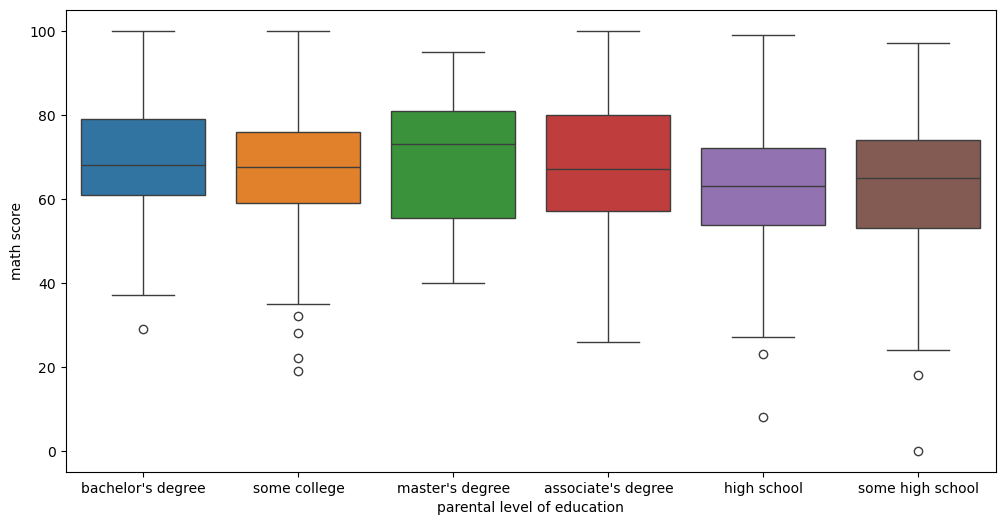

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue="parental level of education")

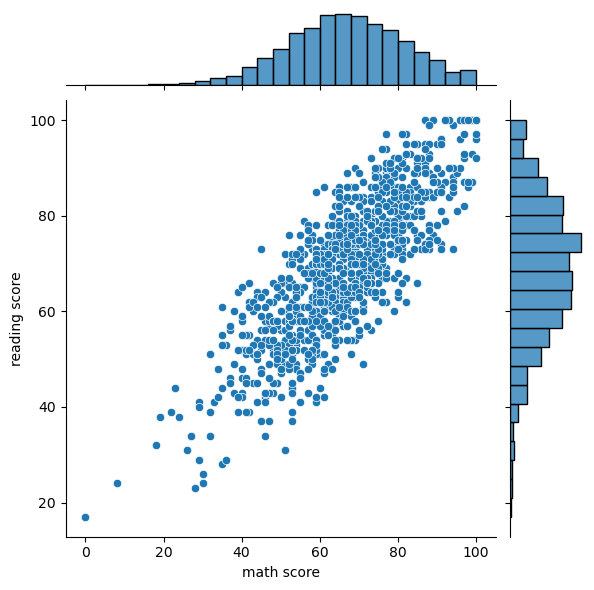

In [34]:
sns.jointplot(x='math score',y='reading score',data=df)

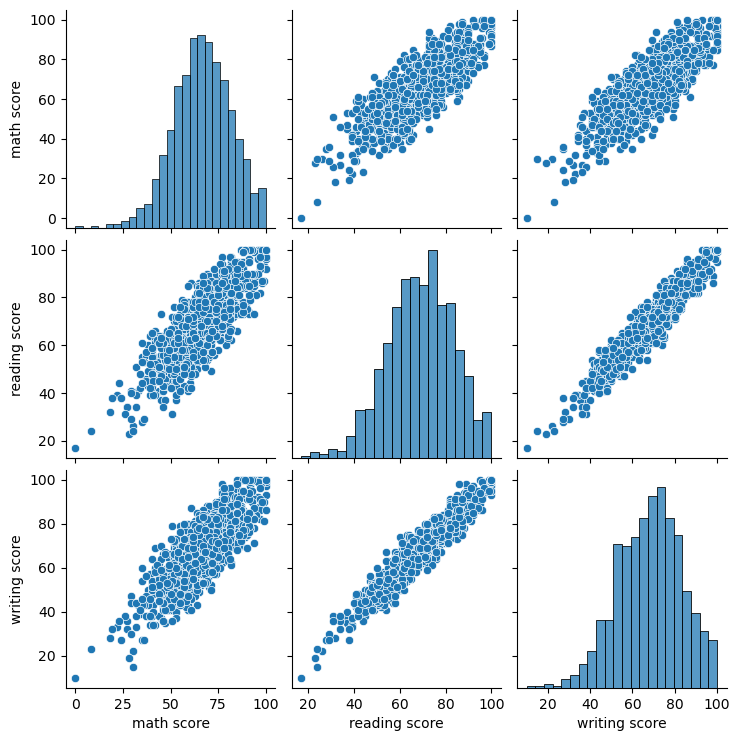

In [35]:
sns.pairplot(df)

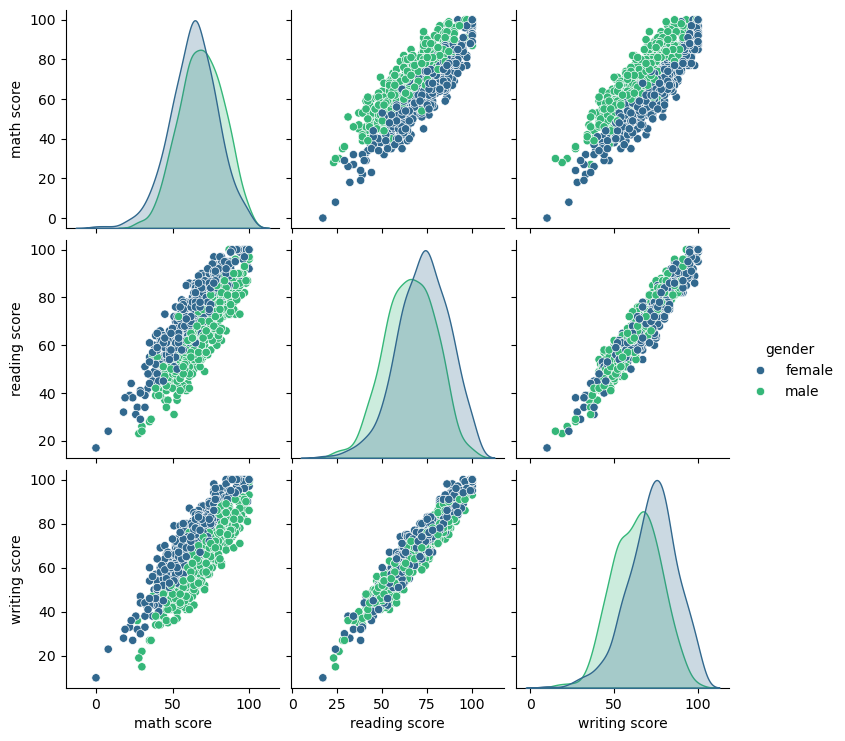

In [36]:
sns.pairplot(df,hue='gender',palette='viridis')

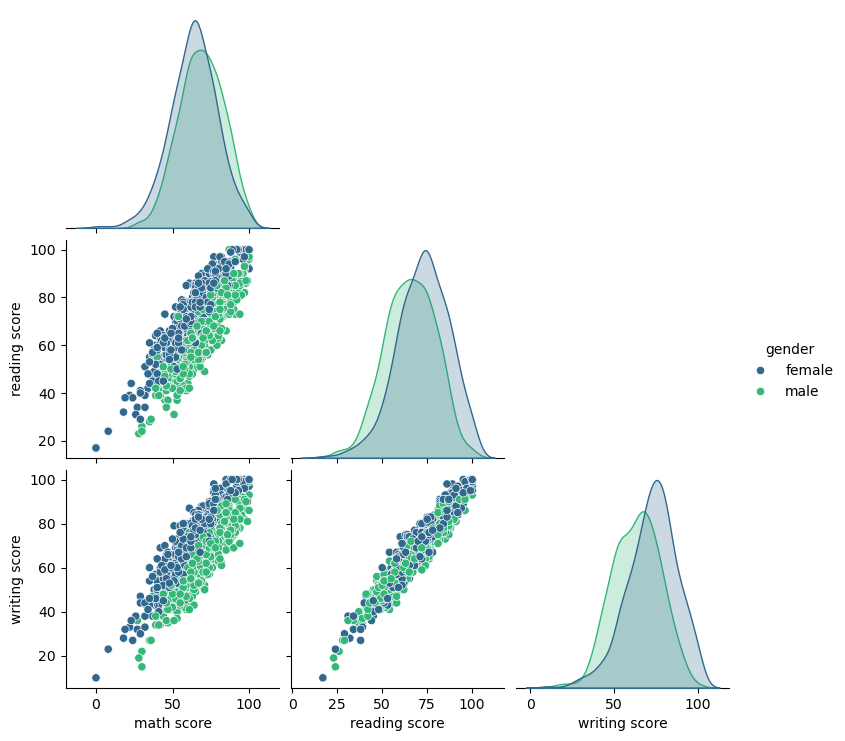

In [37]:
sns.pairplot(df,hue='gender',palette='viridis',corner=True )

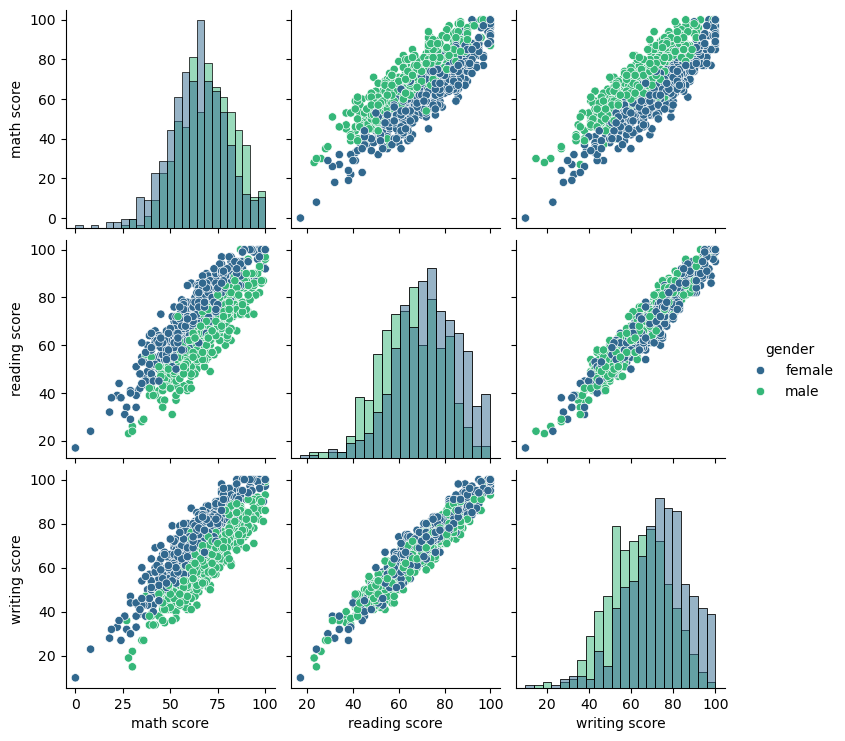

In [38]:
sns.pairplot(df,hue='gender',palette='viridis',diag_kind='hist')

#  Matrix Plots


<Axes: ylabel='Countries'>

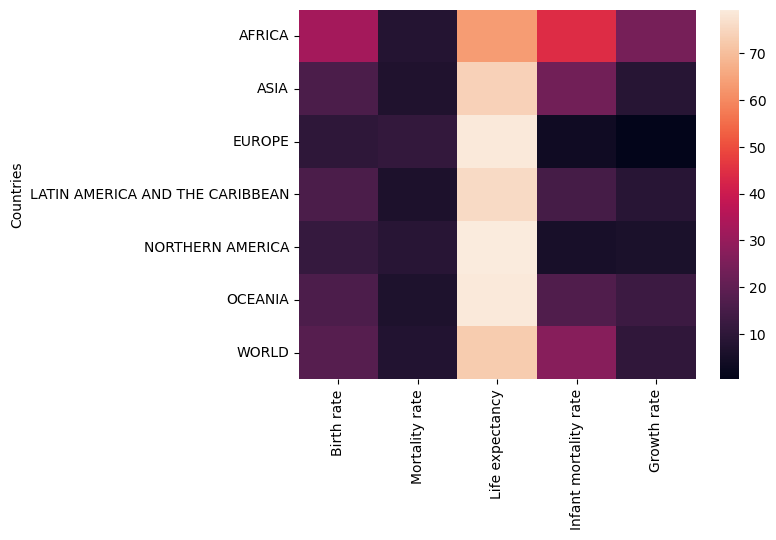

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('country_table.csv')
df = df.set_index("Countries")
df
sns.heatmap(df)

<Axes: ylabel='Countries'>

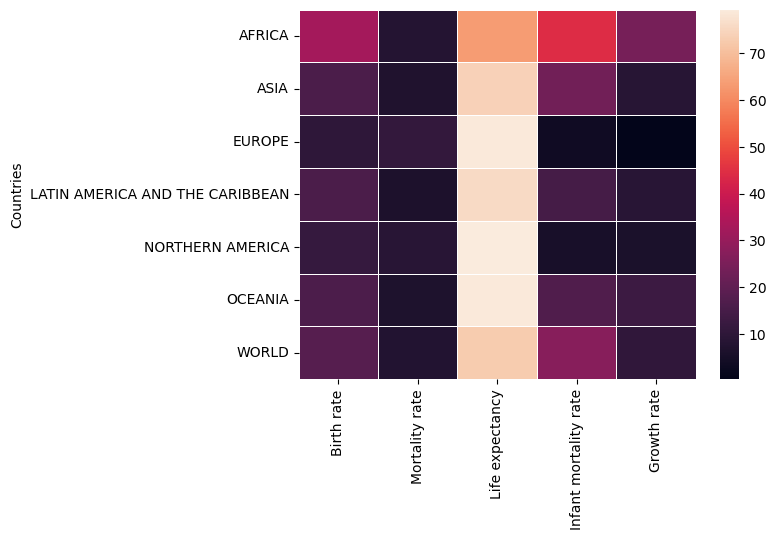

In [44]:
sns.heatmap(df,linewidths=0.5)

<Axes: ylabel='Countries'>

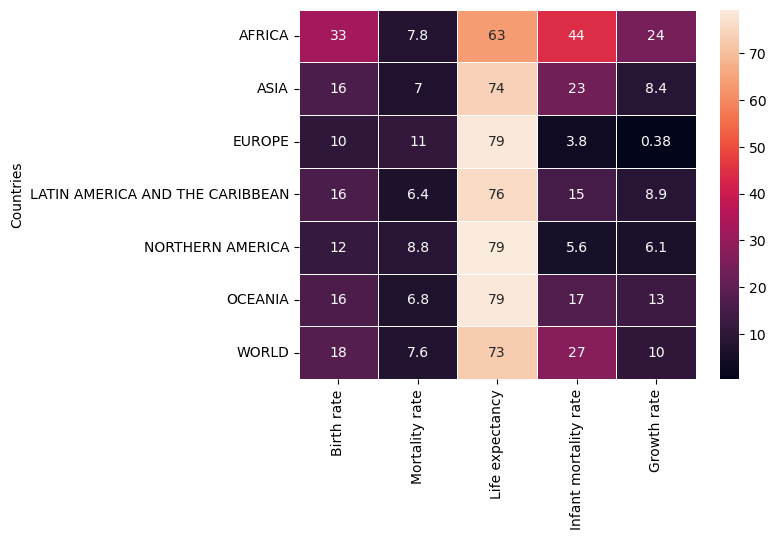

In [45]:
sns.heatmap(df,linewidths=0.5,annot=True)

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: ylabel='Countries'>

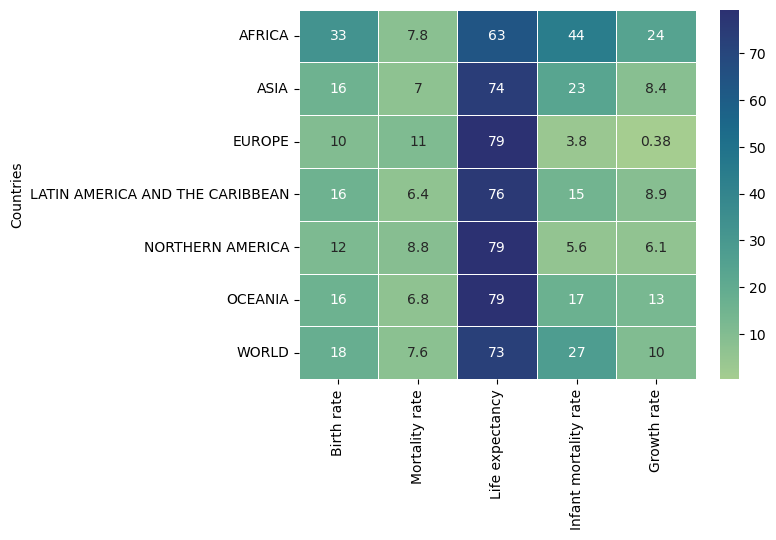

In [48]:
sns.heatmap(df,linewidths=0.5,annot=True,cmap="crest")

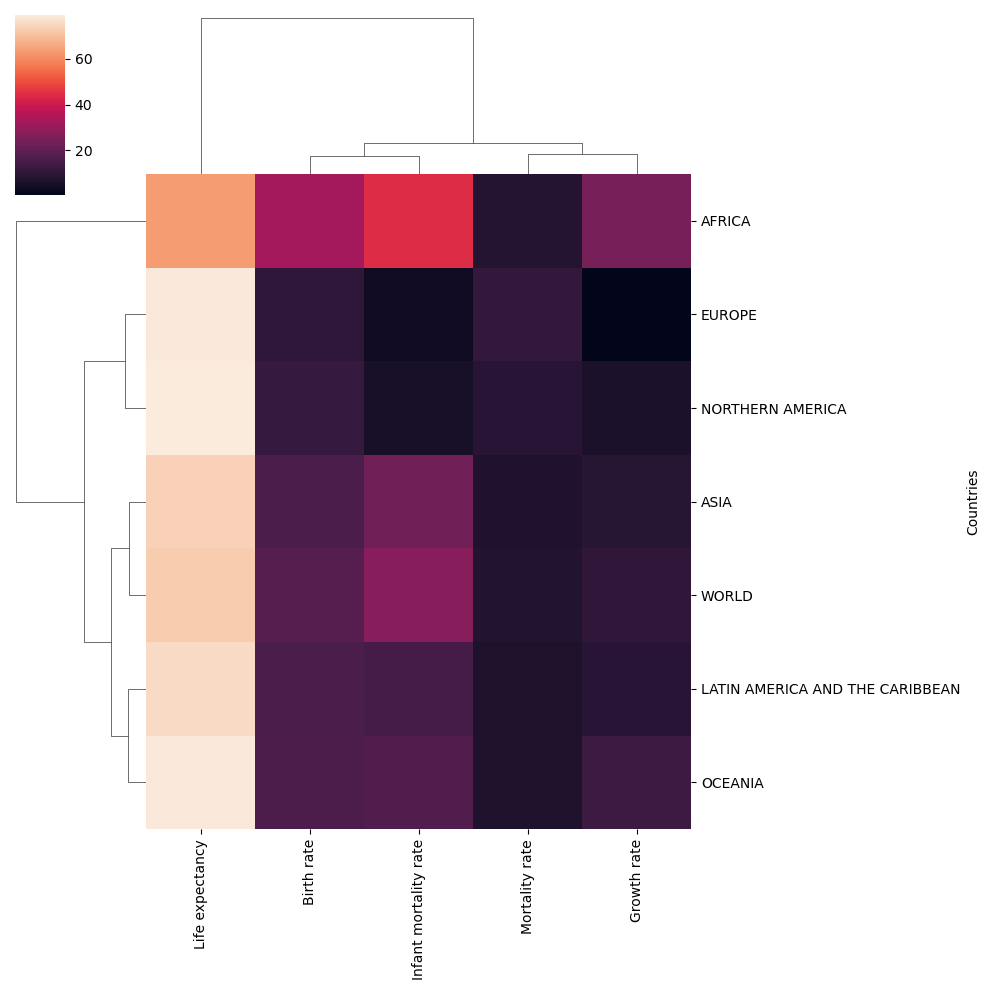

In [50]:
sns.clustermap(df)

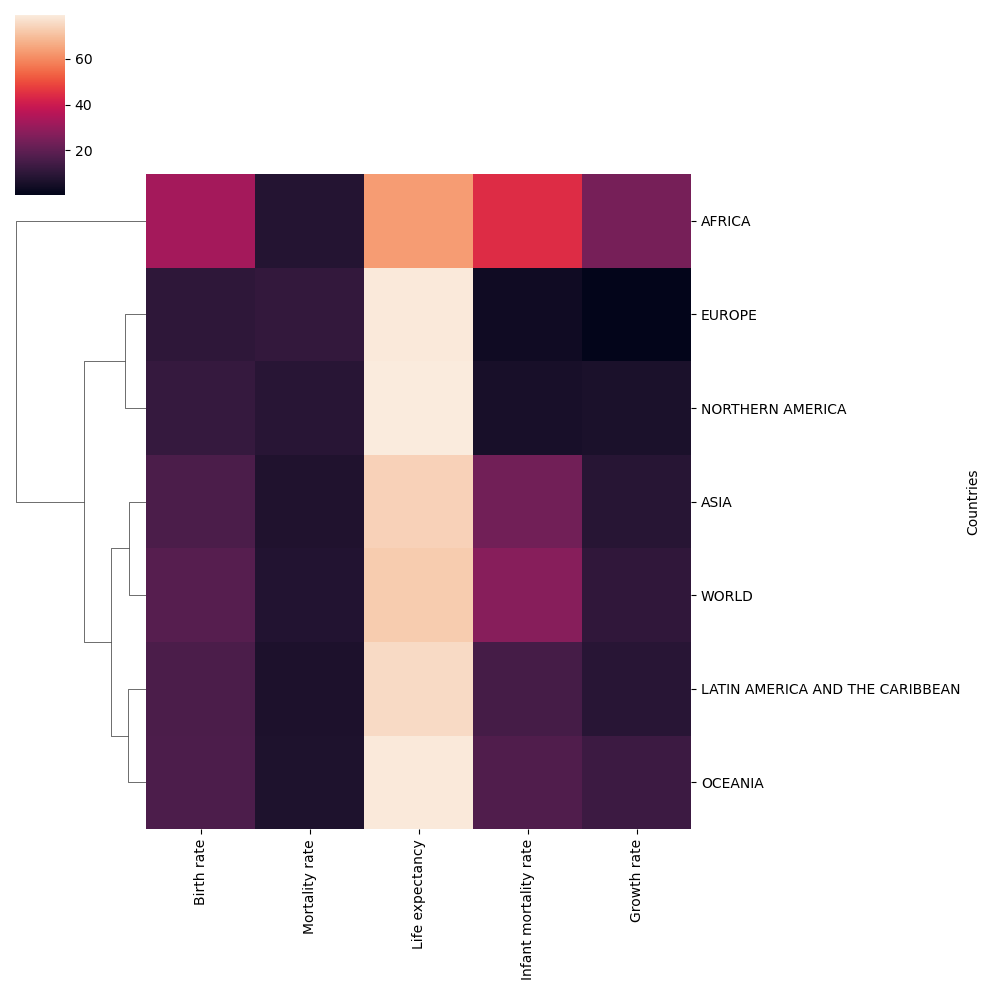

In [53]:
sns.clustermap(df,col_cluster=False)